In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

In [2]:
import generate1

# GENERATE SYNTHETIC IMAGE

In [7]:
sample = 35
main_path = '/Users/m_feriansyahrt/Documents/S2/PCL/Proyek/day2night/dataset'
#main_path = './dataset'
noise_model_path = 'noise_profiler/h-gauss-s20-v1'
night_illum_path = 'utils/gray_card_illum_dict.mat'

# camera pipeline parameters
stages = ['raw', 'active_area_cropping', 'linearization', 'normal', 'white_balance',
          'demosaic', 'xyz', 'srgb', 'fix_orient', 'gamma', 'tone']

params = {
    'save_as': 'png',  # options: 'jpg', 'png', 'tif', etc.
    'white_balancer': 'default',  # options: default, or self-defined module
    'demosaicer': 'menon2007',  # options: '' for simple interpolation,
    #          'EA' for edge-aware,
    #          'VNG' for variable number of gradients,
    #          'menon2007' for Menon's algorithm
    'tone_curve': 'simple-s-curve',  # options: 'simple-s-curve', 'default', or self-defined module
}

iso_list = '50,1600,3200'.split(',')
for i in range(0, len(iso_list)):
    iso_list[i] = int(iso_list[i])

dim = True
relight = True
iso = iso_list[1]
discard_black_level = False
_clip = True
relight_local = True
min_num_lights = 5
max_num_lights = 5
min_light_size = 2.5
max_light_size = 3
num_sat_lights = 2
noised = True
wb_random = False

params_synth = {'dim' : dim, 'relight' : relight, 'iso' : iso,
            'discard_black_level' : discard_black_level,
            '_clip' : _clip, 
            'relight_local' : relight_local,
            'min_num_lights' : min_num_lights, 'max_num_lights' : max_num_lights,
            'min_light_size' : min_light_size, 'max_light_size' : max_light_size,
            'num_sat_lights' : num_sat_lights,'wb_random' : wb_random }

In [8]:
# Generate Synthetic Image

day,clean,clean_raw,metadata_raw,noisy,noisy_raw = generate1.generate_synthetic_image(sample,main_path,
                                                noise_model_path,night_illum_path,
                                                stages,params,noisy_im = noised,**params_synth)

gt_illum_mean

[ 0.38306227  0.5         0.16444532]
gt_illum_cov

[[ 0.01444014  0.         -0.0054611 ]
 [ 0.          0.          0.        ]
 [-0.0054611   0.          0.00244714]]
wb_random : false 

sampled_wb

[[ 0.59639085  0.5         0.05671734]
 [ 0.4108442   0.5         0.18997028]
 [ 0.42112042  0.5         0.20319953]
 [ 0.46773803  0.5         0.15259717]
 [ 0.35139956  0.5         0.16172131]
 [ 0.61474664  0.5         0.09491827]
 [ 0.59961206  0.5         0.0774532 ]]
sampled_wb low temp

[[ 0.59639085  0.5         0.05671734]
 [ 0.4108442   0.5         0.18997028]
 [ 0.42112042  0.5         0.20319953]
 [ 0.46773803  0.5         0.15259717]
 [ 0.35139956  0.5         0.16172131]
 [ 0.61474664  0.5         0.09491827]
 [ 0.59961206  0.5         0.0774532 ]]
sampled_wb low temp after multiplication 

[[ 0.59639085  0.5         0.05671734]
 [ 0.4108442   0.5         0.18997028]
 [ 0.42112042  0.5         0.20319953]
 [ 0.46773803  0.5         0.15259717]
 [ 0.35139956  

In [ ]:
# Save semua citra ke path

save_path = '/Users/m_feriansyahrt/Documents/S2/PCL/Proyek/RAW_DATA_BARU/'
#save_path = './RAW_DATA/'
generate1.save_clean_raw_image(save_path,clean,clean_raw,metadata_raw,noisy,noisy_raw)

(-0.5, 4031.5, 3023.5, -0.5)

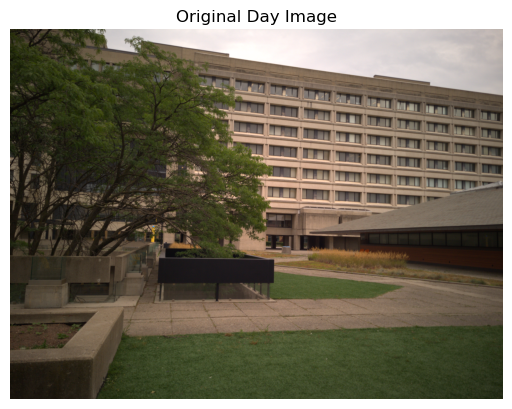

In [9]:
plt.imshow(day)
plt.title('Original Day Image')
plt.axis('off')

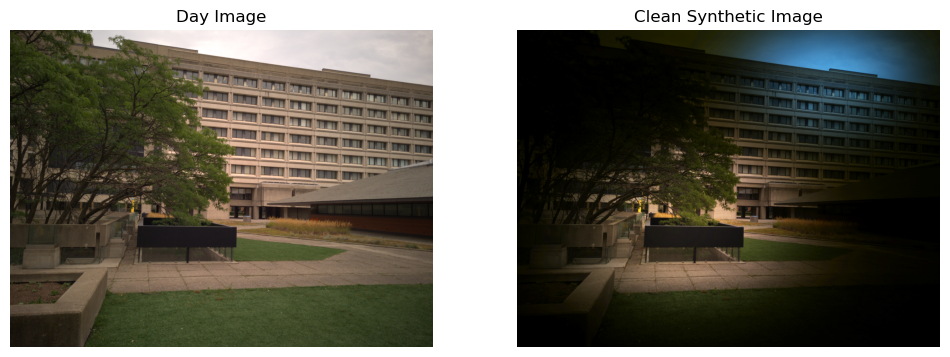

In [19]:
fig,ax = plt.subplots(1,2,figsize = [12,8])
#ax[0].imshow(rgb)
ax[0].imshow(day)
ax[0].set_title('Day Image')
ax[0].axis('off')
ax[1].imshow(clean)
ax[1].set_title('Clean Synthetic Image')
ax[1].axis('off')

fig.savefig('/Users/m_feriansyahrt/Documents/S2/Studi Mandiri/sampel citra untuk report-6/im_sample_compare.png')

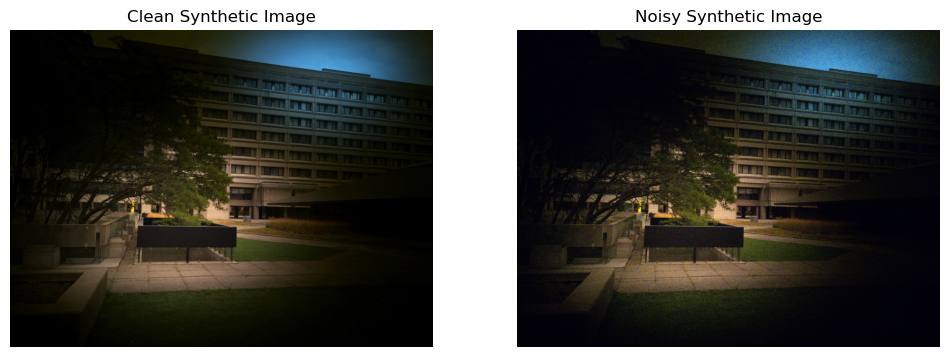

In [17]:
fig,ax = plt.subplots(1,2,figsize = [12,8])
#ax[0].imshow(rgb)
ax[0].imshow(clean)
ax[0].set_title('Clean Synthetic Image')
ax[0].axis('off')
ax[1].imshow(noisy)
ax[1].set_title('Noisy Synthetic Image')
ax[1].axis('off')

fig.savefig('/Users/m_feriansyahrt/Documents/S2/Studi Mandiri/sampel citra untuk report-6/im_sample.png')

# SECOND PART RAW PROCESSING

In [16]:
from raw_processing_synthetic import raw_processing

In [31]:
# Process image directly from noisy_raw & metadata_raw variable

im_direct,im_direct_awb = raw_processing.raw_processing(noisy_raw,metadata_raw)

In [32]:
# Process image from saved image and metadata (bisa digunakan untuk test image dari gdrive)

#path = './RAW_DATA/'
path = '/Users/m_feriansyahrt/Documents/S2/PCL/Proyek/RAW_DATA_BARU/'
no = 0
im_filename = f'noisy_raw{no}'
metadata_filename = f'metadata_raw{no}' 

im_saved,im_saved_awb = raw_processing.raw_processing_from_saved_im(path,metadata_filename,im_filename)

(-0.5, 4031.5, 3023.5, -0.5)

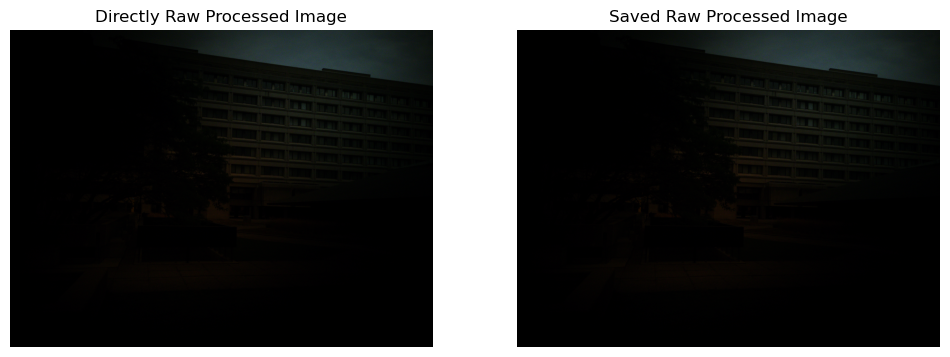

In [34]:
fig,ax = plt.subplots(1,2,figsize = [12,8])
ax[0].imshow(im_direct)
ax[0].axis('off')
ax[0].set_title('Directly Raw Processed Image')
ax[1].imshow(im_saved)
ax[1].set_title('Saved Raw Processed Image')
ax[1].axis('off')

(-0.5, 4031.5, 3023.5, -0.5)

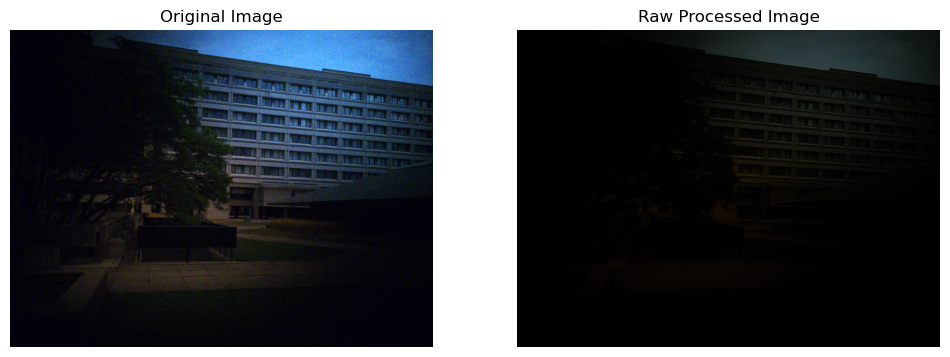

In [35]:
fig,ax = plt.subplots(1,2,figsize = [12,8])
ax[0].imshow(noisy)
ax[0].axis('off')
ax[0].set_title('Original Image')
ax[1].imshow(im_direct)
ax[1].set_title('Raw Processed Image')
ax[1].axis('off')

# SECOND PART IMAGE PROCESSING

In [36]:
from rgb_processing_synthetic.denoise import denoising_image

from rgb_processing_synthetic.contrast_enhancement import luminance_corr,new_ycbcr,contrast_fixing,ycbcr2rgb
from rgb_processing_synthetic.contrast_enhancement import saturation_fixing,glob_mean_contrast,s_curve_corr1
from rgb_processing_synthetic.contrast_enhancement import histogram_stretching,cond_contrast_corr

from rgb_processing_synthetic.sharpening import unsharp_masking

from rgb_processing_synthetic.AWB import grayness_index

In [43]:
## Denoising

# True = image being raw processed (denoising_image func. will process "iskip_raw_processing_image" variable)
# False = skip raw processing method (denoising_image func. will process "raw_processed_image" variable)
raw_process = False
skip_raw_processing_image = noisy
raw_processed_image = im_direct

image = denoising_image(skip_raw_processing_image, raw_processed_image, raw_process)

## Contrast Enhancement
# Local Contrast Enhancement
gamma = 1.8
Y,Y_ = luminance_corr(image,gamma)

old_im_ycbcr, new_im_ycbcr = new_ycbcr(image,Y_)

newY_ = new_im_ycbcr[:,:,0] # after luminance correction
im_ycbcr = contrast_fixing(old_im_ycbcr.astype(np.uint8),newY_.astype(np.uint8))
im_rgb = ycbcr2rgb(im_ycbcr)

im_rgb_s = saturation_fixing(im_rgb,old_im_ycbcr,new_im_ycbcr)

sat_fix = False
beta = 0.8

# Global Mean Contrast
if sat_fix:
    im_glob = glob_mean_contrast(im_rgb_s,beta) # Change beta value for tuning
    txt_sat = 'Sat. Fix Applied'
else:
    im_glob = glob_mean_contrast(im_rgb,beta) # Change beta value for tuning
    txt_sat = 'Sat. Fix Not Applied'

# S-Curve Correction
alpha = 0.5
lambda_value = 1.1

im_s_curve1 = s_curve_corr1(im_glob,alpha,lambda_value)

# Histogram Stretching
im_histed = histogram_stretching(im_s_curve1)

# Conditional Contrast Correction
lower_t = 5
upper_t = 100
gamma = 1.15
alpha = 0.5
lambda_value = 1.1

im_cond_corr,mean_Y,txt = cond_contrast_corr(im_histed,lower_t,upper_t,alpha,lambda_value,gamma)

## Sharpening
#Unsharp Masking
sigma = 1.5 
im_unsharped_masking = unsharp_masking(im_cond_corr,sigma)

##AWB
#Grayness Index
threshold = 4 # -> Tune the threshold value
im_awb = grayness_index(im_unsharped_masking.astype(np.uint8),threshold)


In [44]:
path = '/Users/m_feriansyahrt/Documents/S2/Studi Mandiri/Image_Sample_1/'

# Check if folder does not already exist
if not os.path.exists(path):
    os.mkdir(folder_name)
    print(f"Created folder '{path}'.")
else:
    print(f"Folder '{path}' already exists.")
    
path

Folder '/Users/m_feriansyahrt/Documents/S2/Studi Mandiri/Image_Sample_1/' already exists.


'/Users/m_feriansyahrt/Documents/S2/Studi Mandiri/Image_Sample_1/'

True

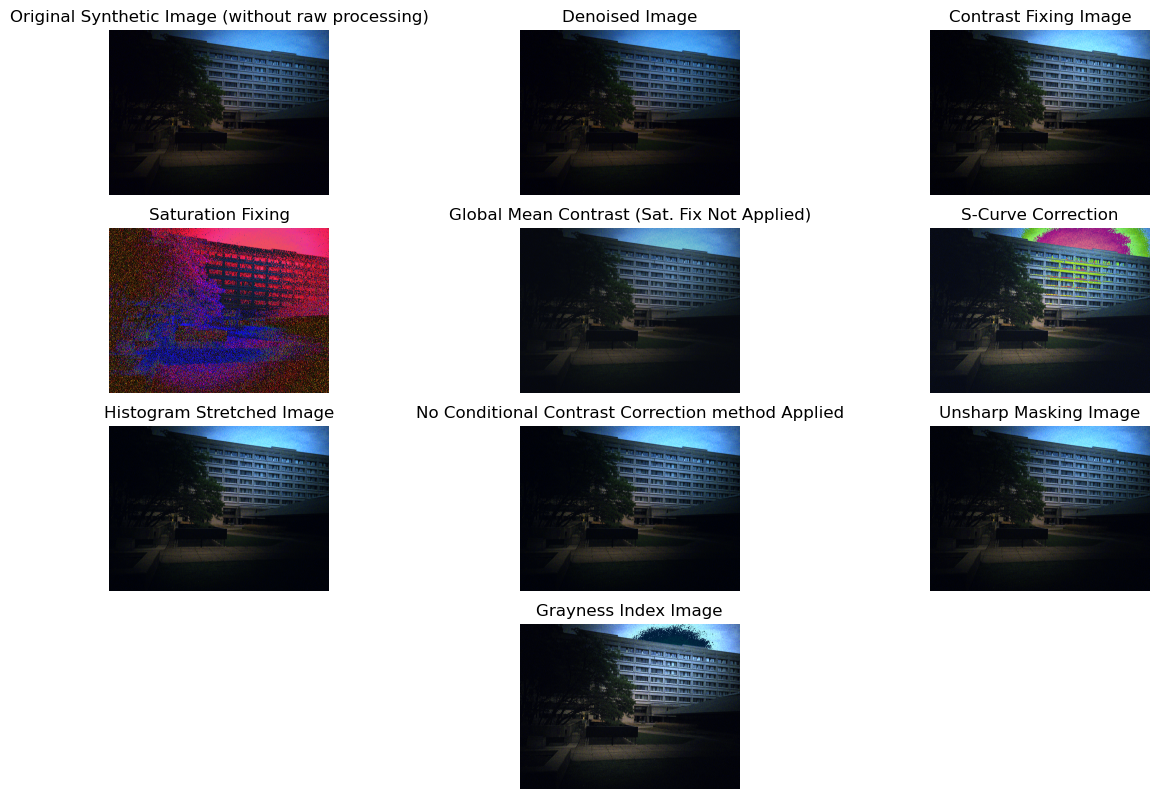

In [45]:
plt.figure(figsize=(15, 15))

n_row = 6
n_col = 3
if raw_process:
    plt.subplot(n_row,n_col,1)
    plt.imshow(raw_processed_image)
    plt.title('Original Synthetic Image (with raw processing)')
    plt.axis('off')
    cv2.imwrite(path + 'Noisy Synthetic Image (Raw Processed).jpg',raw_processed_image[:,:,[2,1,0]])
else:
    plt.subplot(n_row,n_col,1)
    plt.imshow(skip_raw_processing_image)
    plt.title('Original Synthetic Image (without raw processing)')
    plt.axis('off') 
    cv2.imwrite(path + 'Noisy Synthetic Image.jpg',skip_raw_processing_image[:,:,[2,1,0]])

plt.subplot(n_row,n_col,2)
plt.imshow(image)
plt.title('Denoised Image')
plt.axis('off')
cv2.imwrite(path + 'Denoised Image.jpg',image[:,:,[2,1,0]])

plt.subplot(n_row,n_col,3)
plt.imshow(im_rgb)
plt.title('Contrast Fixing Image')
plt.axis('off')
cv2.imwrite(path + 'Contrast Fixing Image.jpg',im_rgb[:,:,[2,1,0]])

plt.subplot(n_row,n_col,4)
plt.imshow(im_rgb_s.astype(np.uint8))
plt.title('Saturation Fixing')
plt.axis('off')
cv2.imwrite(path + 'Saturation Fixing.jpg',im_rgb_s[:,:,[2,1,0]])

plt.subplot(n_row,n_col,5)
plt.imshow(im_glob.astype(np.uint8))
plt.title('Global Mean Contrast' + ' (' + txt_sat + ')')
plt.axis('off')
cv2.imwrite(path + 'Global Mean Contrast' + ' (' + txt_sat + ')' + '.jpg',im_glob[:,:,[2,1,0]])

plt.subplot(n_row,n_col,6)
plt.imshow(im_s_curve1.astype(np.uint8))
plt.title('S-Curve Correction')
plt.axis('off')
cv2.imwrite(path + 'S-Curve Correction.jpg',im_s_curve1[:,:,[2,1,0]])

plt.subplot(n_row,n_col,7)
plt.imshow(im_histed.astype(np.uint8))
plt.title('Histogram Stretched Image')
plt.axis('off')
cv2.imwrite(path + 'Histogram Stretched.jpg',im_histed[:,:,[2,1,0]])

plt.subplot(n_row,n_col,8)
plt.imshow(im_cond_corr.astype(np.uint8))
plt.title(txt)
plt.axis('off')
cv2.imwrite(path + txt + '.jpg',im_cond_corr[:,:,[2,1,0]])

plt.subplot(n_row,n_col,9)
plt.imshow(im_unsharped_masking.astype(np.uint8))
plt.title('Unsharp Masking Image')
plt.axis('off')
cv2.imwrite(path + 'Unsharp Masking.jpg',im_unsharped_masking[:,:,[2,1,0]])

plt.subplot(n_row,n_col,11)
plt.imshow(im_awb)
plt.title('Grayness Index Image')
plt.axis('off')
cv2.imwrite(path + 'Grayness Index.jpg',im_awb[:,:,[2,1,0]])

In [ ]:
path_g = path + 'global_framework_process/'

# Check if folder does not already exist
if not os.path.exists(path_g):
    os.mkdir(path_g)
    print(f"Created folder '{path_g}'.")
else:
    print(f"Folder '{path_g}' already exists.")

path_g

In [ ]:
if raw_process:
    plt.imshow(raw_processed_image)
    plt.title('Original Synthetic Image (with raw processing)')
    plt.axis('off')
    cv2.imwrite(path_g + 'Noisy Synthetic Image (Raw Processed).jpg',raw_processed_image[:,:,[2,1,0]])
else:
    plt.imshow(skip_raw_processing_image)
    plt.title('Original Synthetic Image (without raw processing)')
    plt.axis('off') 
    cv2.imwrite(path_g + 'Noisy Synthetic Image.jpg',skip_raw_processing_image[:,:,[2,1,0]])

In [ ]:
plt.imshow(image)
plt.title('Denoised Image')
plt.axis('off')
cv2.imwrite(path_g + 'Denoised Image.jpg',image[:,:,[2,1,0]])

In [ ]:
plt.imshow(im_cond_corr.astype(np.uint8))
plt.title('After Contrast Enhancement' + ' (' + txt + ' & ' + txt_sat +')')
plt.axis('off')
cv2.imwrite(path_g + 'After Contrast Enhancement' + ' (' + txt + ' & ' + txt_sat +')' + '.jpg',
            im_cond_corr[:,:,[2,1,0]])

In [ ]:
plt.imshow(im_unsharped_masking.astype(np.uint8))
plt.title('After Unsharp Masking')
plt.axis('off')
cv2.imwrite(path_g + 'Unsharp Masking.jpg',im_unsharped_masking[:,:,[2,1,0]])

In [ ]:
plt.imshow(im_awb.astype(np.uint8))
plt.title('After AWB')
plt.axis('off')
cv2.imwrite(path_g + 'Grayness Index.jpg',im_awb[:,:,[2,1,0]])